In [1]:
from lib.abstract_torch import get_device, get_loss, get_optimizer
from lib.dataloader import get_MNIST_loaders, get_FMNIST_loaders, get_CIFAR100_loaders, get_CIFAR10_loaders
from lib.model import ANN
from lib.train import train
from lib.test import test
from lib.growth_schedules import get_handcrafted_schedule
from lib.visualize import (visualize_pathes,
                          visualize_statistical_reliability,
                          visualize_box_plot)               

import os
import numpy as np

In [2]:
device = get_device()

In [3]:
path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "\\data"

# MNIST

## Get data loaders

In [4]:
batch_size=128

In [5]:
train_loader, val_loader, test_loader = get_MNIST_loaders(data_path, range(10), batch_size)

## Random Initialization

In [6]:
init_name = "random"
savefig = "MNIST_random"

### Define, train and test both root & target models

In [7]:
# Network's initial architecture
num_inputs = 28*28
num_hidden = 10
num_outputs = 10

# Network's final architecture
num_hidden_target = 100

# Loss & optimizer
loss_name = "MSE" # "CE"
optimizer_name = "Adam"

# Hyperparameters
num_epochs = 3
lr = 5e-3
growth_schedule = None

# Experiment parameters
num_repetitions = 5

#### Root model

In [8]:
test_acc_roots = []
for i in range(num_repetitions) :
    root_model = ANN(num_inputs, num_hidden, num_outputs).to(device)
    _ = train(root_model, num_outputs, growth_schedule, loss_name, optimizer_name, lr, train_loader, val_loader, num_epochs, batch_size, device, verbose=0)
    test_acc_root = test(root_model, test_loader, batch_size, device)
    test_acc_roots.append(test_acc_root)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:13<00:00,  4.44s/it]


In [9]:
test_acc_roots

[43.64987179487179,
 46.57448717948719,
 49.27897435897438,
 22.12602564102565,
 37.77038461538463]

#### Target model

In [10]:
test_acc_targets = []
for i in range(num_repetitions) :
    target_model = ANN(num_inputs, num_hidden_target, num_outputs).to(device)
    _ = train(target_model, num_outputs, growth_schedule, loss_name, optimizer_name, lr, train_loader, val_loader, num_epochs, batch_size, device, verbose=0)
    test_acc_target = test(target_model, test_loader, batch_size, device)
    test_acc_targets.append(test_acc_target)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:13<00:00,  4.41s/it]


In [11]:
test_acc_targets

[93.92089743589742,
 93.11923076923078,
 93.63012820512819,
 93.4596153846154,
 93.68961538461542]

### Grow root model

In [12]:
# Growth parameters
num_neurons = 9

In [13]:
growth_schedules = get_handcrafted_schedule(num_neurons)

In [14]:
test_accs_repeted = []
for i in range(num_repetitions) :
    test_accs = []
    for growth_schedule in growth_schedules :
        root_model = ANN(num_inputs, num_hidden, num_outputs).to(device)
        _ = train(root_model,
                  num_outputs,
                  growth_schedule,
                  loss_name, 
                  optimizer_name, lr, 
                  train_loader, val_loader, 
                  num_epochs, batch_size, 
                  device,
                  init_name=init_name,
                  verbose=0)
        test_acc = test(root_model, test_loader, batch_size, device)
        test_accs.append(test_acc)
    test_accs_repeted.append(test_accs)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:14<00:00,  4.73s/it]


In [15]:
test_accs_repeted = np.array(test_accs_repeted)
test_accs = np.mean(test_accs_repeted, 0)

### Visualize results

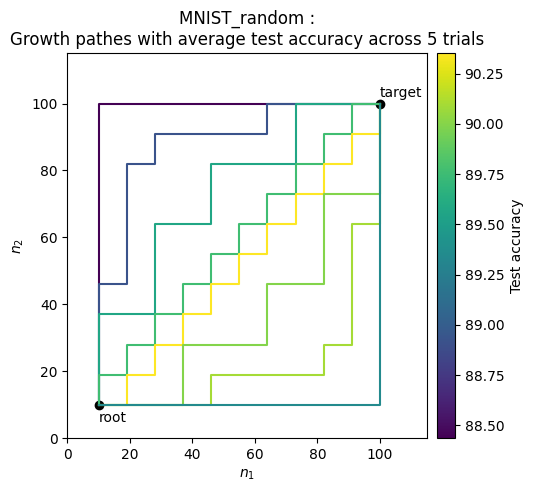

In [16]:
visualize_pathes(num_hidden, num_hidden_target, growth_schedules, test_accs, savefig)

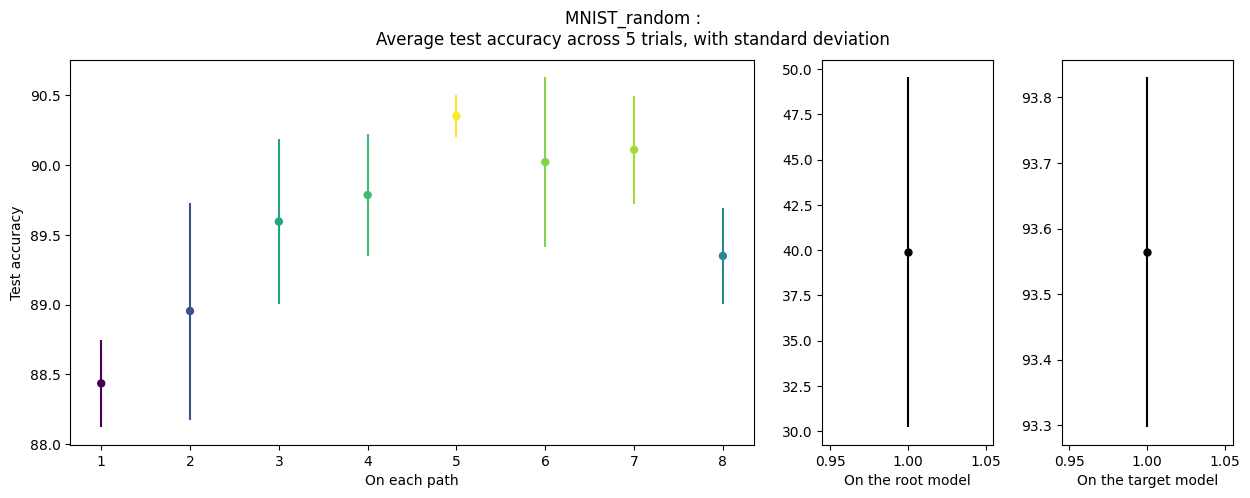

In [17]:
visualize_statistical_reliability (test_accs_repeted, test_accs, test_acc_roots, test_acc_targets,
                                   free_lim=True, savefig=savefig)

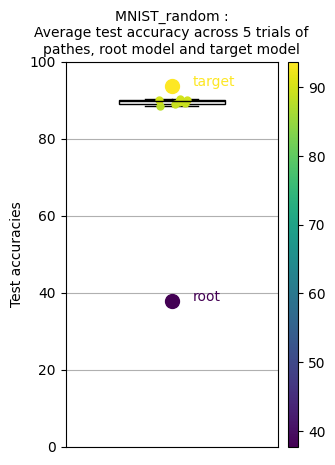

In [18]:
visualize_box_plot(test_accs, test_acc_root, test_acc_target, savefig)

## GradMax Initialization

In [19]:
init_name = "gradmax"
savefig = "MNIST_gradmax"

### Define, train and test both root & target models

In [20]:
# Network's initial architecture
num_inputs = 28*28
num_hidden = 10
num_outputs = 10

# Network's final architecture
num_hidden_target = 100

# Loss & optimizer
loss_name = "MSE" # "CE"
optimizer_name = "Adam"

# Hyperparameters
num_epochs = 3
lr = 5e-3
growth_schedule = None

# Experiment parameters
num_repetitions = 5

#### Root model

In [21]:
test_acc_roots = []
for i in range(num_repetitions) :
    root_model = ANN(num_inputs, num_hidden, num_outputs).to(device)
    _ = train(root_model, num_outputs, growth_schedule, loss_name, optimizer_name, lr, train_loader, val_loader, num_epochs, batch_size, device, verbose=0)
    test_acc_root = test(root_model, test_loader, batch_size, device)
    test_acc_roots.append(test_acc_root)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:12<00:00,  4.32s/it]


In [22]:
test_acc_roots

[60.5171794871795,
 35.05641025641027,
 46.49461538461539,
 44.88217948717948,
 62.80038461538462]

#### Target model

In [23]:
test_acc_targets = []
for i in range(num_repetitions) :
    target_model = ANN(num_inputs, num_hidden_target, num_outputs).to(device)
    _ = train(target_model, num_outputs, growth_schedule, loss_name, optimizer_name, lr, train_loader, val_loader, num_epochs, batch_size, device, verbose=0)
    test_acc_target = test(target_model, test_loader, batch_size, device)
    test_acc_targets.append(test_acc_target)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:14<00:00,  4.93s/it]


In [24]:
test_acc_targets

[93.42910256410258,
 93.3492307692308,
 94.260641025641,
 93.95000000000002,
 93.00846153846155]

### Grow root model

In [25]:
# Growth parameters
num_neurons = 9

In [26]:
growth_schedules = get_handcrafted_schedule(num_neurons)

In [27]:
test_accs_repeted = []
for i in range(num_repetitions) :
    test_accs = []
    for growth_schedule in growth_schedules :
        root_model = ANN(num_inputs, num_hidden, num_outputs).to(device)
        _ = train(root_model,
                  num_outputs,
                  growth_schedule,
                  loss_name, 
                  optimizer_name, lr, 
                  train_loader, val_loader, 
                  num_epochs, batch_size, 
                  device,
                  init_name=init_name,
                  verbose=0)
        test_acc = test(root_model, test_loader, batch_size, device)
        test_accs.append(test_acc)
    test_accs_repeted.append(test_accs)

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]C:\Users\Mathis\Desktop\Bahut\M2\Stage\Master-Thesis\Workspace\Growth\Motivation\lib\model.py:36: RuntimeWarning: divide by zero encountered in divide
  scaler = c / np.sqrt(eigenvals.sum())
100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:13<00:00,  4.56s/it]


In [28]:
test_accs_repeted = np.array(test_accs_repeted)
test_accs = np.mean(test_accs_repeted, 0)

### Visualize results

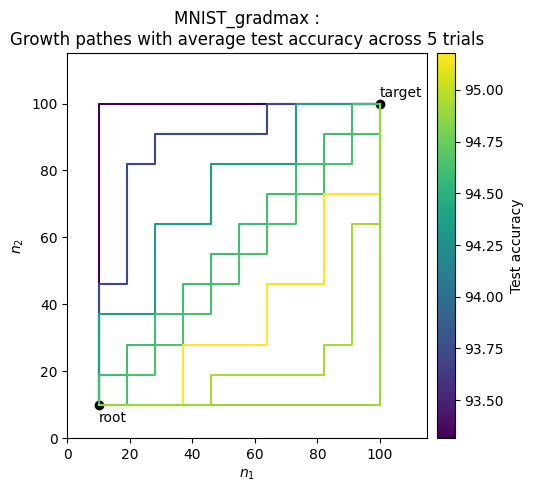

In [29]:
visualize_pathes(num_hidden, num_hidden_target, growth_schedules, test_accs, savefig)

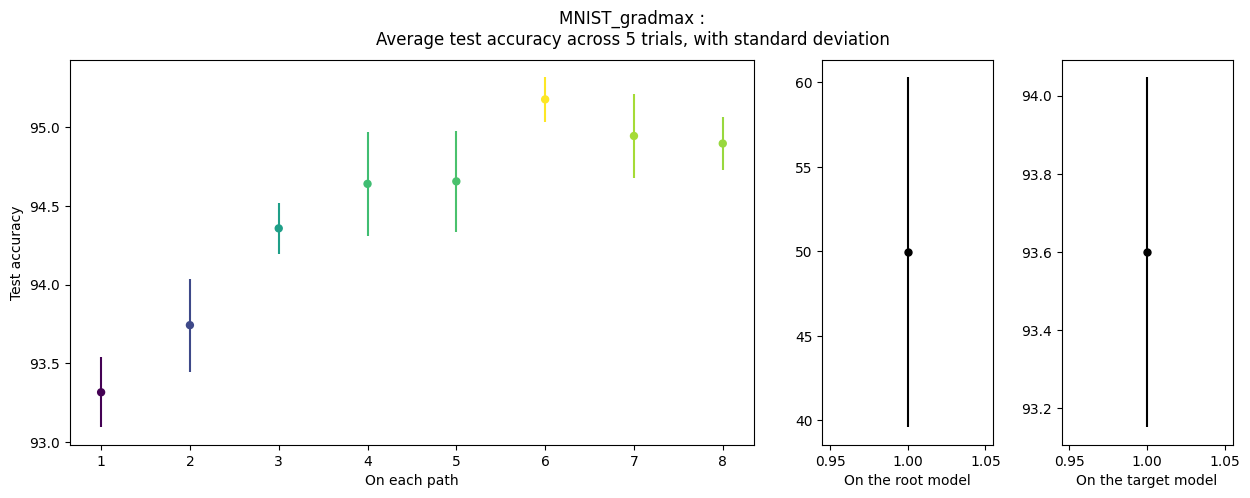

In [30]:
visualize_statistical_reliability (test_accs_repeted, test_accs, test_acc_roots, test_acc_targets,
                                   free_lim=True, savefig=savefig)

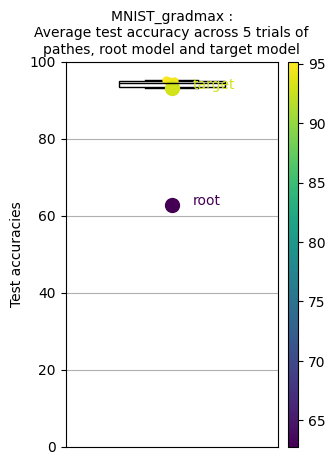

In [31]:
visualize_box_plot(test_accs, test_acc_root, test_acc_target, savefig)

# FMNIST

## Get data loaders

In [34]:
batch_size=128

In [35]:
train_loader, val_loader, test_loader = get_FMNIST_loaders(data_path, range(10), batch_size)

## Random Initialization

In [36]:
init_name = "random"
savefig = "FMNIST_random"

### Define, train and test both root & target models

In [37]:
# Network's initial architecture
num_inputs = 28*28
num_hidden = 10
num_outputs = 10

# Network's final architecture
num_hidden_target = 100

# Loss & optimizer
loss_name = "MSE" # "CE"
optimizer_name = "Adam"

# Hyperparameters
num_epochs = 3
lr = 5e-3
growth_schedule = None

# Experiment parameters
num_repetitions = 5

#### Root model

In [38]:
test_acc_roots = []
for i in range(num_repetitions) :
    root_model = ANN(num_inputs, num_hidden, num_outputs).to(device)
    _ = train(root_model, num_outputs, growth_schedule, loss_name, optimizer_name, lr, train_loader, val_loader, num_epochs, batch_size, device, verbose=0)
    test_acc_root = test(root_model, test_loader, batch_size, device)
    test_acc_roots.append(test_acc_root)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:12<00:00,  4.25s/it]


In [39]:
test_acc_roots

[37.449999999999996,
 63.09153846153849,
 56.10910256410256,
 73.61743589743588,
 63.12076923076924]

#### Target model

In [40]:
test_acc_targets = []
for i in range(num_repetitions) :
    target_model = ANN(num_inputs, num_hidden_target, num_outputs).to(device)
    _ = train(target_model, num_outputs, growth_schedule, loss_name, optimizer_name, lr, train_loader, val_loader, num_epochs, batch_size, device, verbose=0)
    test_acc_target = test(target_model, test_loader, batch_size, device)
    test_acc_targets.append(test_acc_target)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:13<00:00,  4.41s/it]


In [41]:
test_acc_targets

[84.0247435897436,
 83.34358974358973,
 84.07487179487178,
 82.93294871794872,
 82.26115384615387]

### Grow root model

In [42]:
# Growth parameters
num_neurons = 9

In [43]:
growth_schedules = get_handcrafted_schedule(num_neurons)

In [44]:
test_accs_repeted = []
for i in range(num_repetitions) :
    test_accs = []
    for growth_schedule in growth_schedules :
        root_model = ANN(num_inputs, num_hidden, num_outputs).to(device)
        _ = train(root_model,
                  num_outputs,
                  growth_schedule,
                  loss_name, 
                  optimizer_name, lr, 
                  train_loader, val_loader, 
                  num_epochs, batch_size, 
                  device,
                  init_name=init_name,
                  verbose=0)
        test_acc = test(root_model, test_loader, batch_size, device)
        test_accs.append(test_acc)
    test_accs_repeted.append(test_accs)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:13<00:00,  4.49s/it]


In [45]:
test_accs_repeted = np.array(test_accs_repeted)
test_accs = np.mean(test_accs_repeted, 0)

### Visualize results

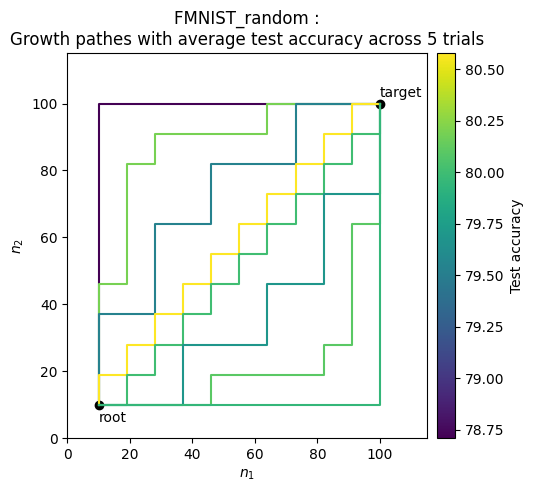

In [46]:
visualize_pathes(num_hidden, num_hidden_target, growth_schedules, test_accs, savefig)

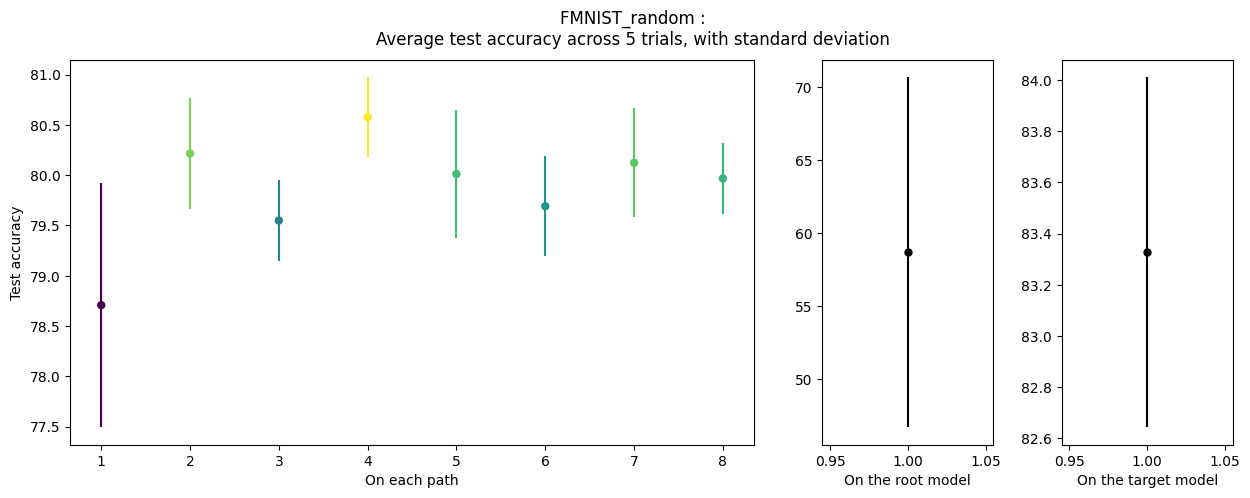

In [47]:
visualize_statistical_reliability (test_accs_repeted, test_accs, test_acc_roots, test_acc_targets,
                                   free_lim=True, savefig=savefig)

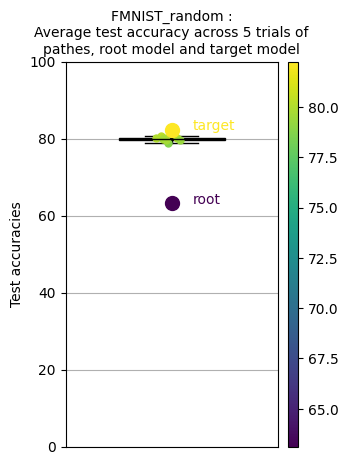

In [48]:
visualize_box_plot(test_accs, test_acc_root, test_acc_target, savefig)

## GradMax Initialization

In [47]:
init_name = "gradmax"
savefig = "FMNIST_gradmax"

### Define, train and test both root & target models

In [48]:
# Network's initial architecture
num_inputs = 28*28
num_hidden = 10
num_outputs = 10

# Network's final architecture
num_hidden_target = 100

# Loss & optimizer
loss_name = "MSE" # "CE"
optimizer_name = "Adam"

# Hyperparameters
num_epochs = 3
lr = 5e-3
growth_schedule = None

# Experiment parameters
num_repetitions = 5

#### Root model

In [49]:
test_acc_roots = []
for i in range(num_repetitions) :
    root_model = ANN(num_inputs, num_hidden, num_outputs).to(device)
    _ = train(root_model, num_outputs, growth_schedule, loss_name, optimizer_name, lr, train_loader, val_loader, num_epochs, batch_size, device, verbose=0)
    test_acc_root = test(root_model, test_loader, batch_size, device)
    test_acc_roots.append(test_acc_root)

100%|██████████| 3/3 [00:10<00:00,  3.62s/it]


In [50]:
test_acc_roots

[40.63487179487179,
 53.745641025641035,
 67.60807692307692,
 63.28089743589742,
 60.787564102564104]

#### Target model

In [51]:
test_acc_targets = []
for i in range(num_repetitions) :
    target_model = ANN(num_inputs, num_hidden_target, num_outputs).to(device)
    _ = train(target_model, num_outputs, growth_schedule, loss_name, optimizer_name, lr, train_loader, val_loader, num_epochs, batch_size, device, verbose=0)
    test_acc_target = test(target_model, test_loader, batch_size, device)
    test_acc_targets.append(test_acc_target)

100%|██████████| 3/3 [00:11<00:00,  3.81s/it]


In [52]:
test_acc_targets

[83.71397435897435,
 83.80423076923077,
 82.80269230769231,
 83.9347435897436,
 83.09320512820516]

### Grow root model

In [53]:
# Growth parameters
num_neurons = 9

In [54]:
growth_schedules = get_handcrafted_schedule(num_neurons)

In [55]:
test_accs_repeted = []
for i in range(num_repetitions) :
    test_accs = []
    for growth_schedule in growth_schedules :
        root_model = ANN(num_inputs, num_hidden, num_outputs).to(device)
        _ = train(root_model,
                  num_outputs,
                  growth_schedule,
                  loss_name, 
                  optimizer_name, lr, 
                  train_loader, val_loader, 
                  num_epochs, batch_size, 
                  device,
                  init_name=init_name,
                  verbose=0)
        test_acc = test(root_model, test_loader, batch_size, device)
        test_accs.append(test_acc)
    test_accs_repeted.append(test_accs)

100%|██████████| 3/3 [00:11<00:00,  3.85s/it]


In [56]:
test_accs_repeted = np.array(test_accs_repeted)
test_accs = np.mean(test_accs_repeted, 0)

### Visualize results

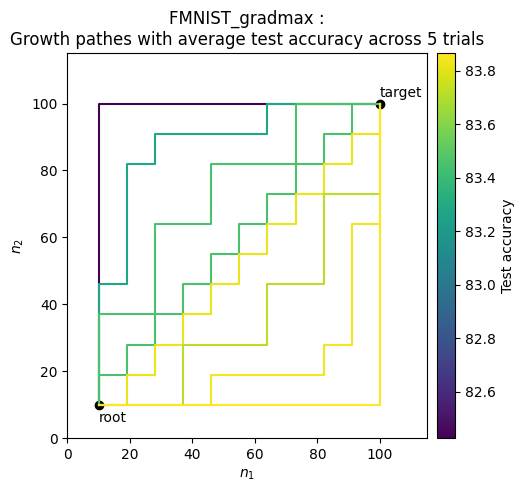

In [57]:
visualize_pathes(num_hidden, num_hidden_target, growth_schedules, test_accs, savefig)

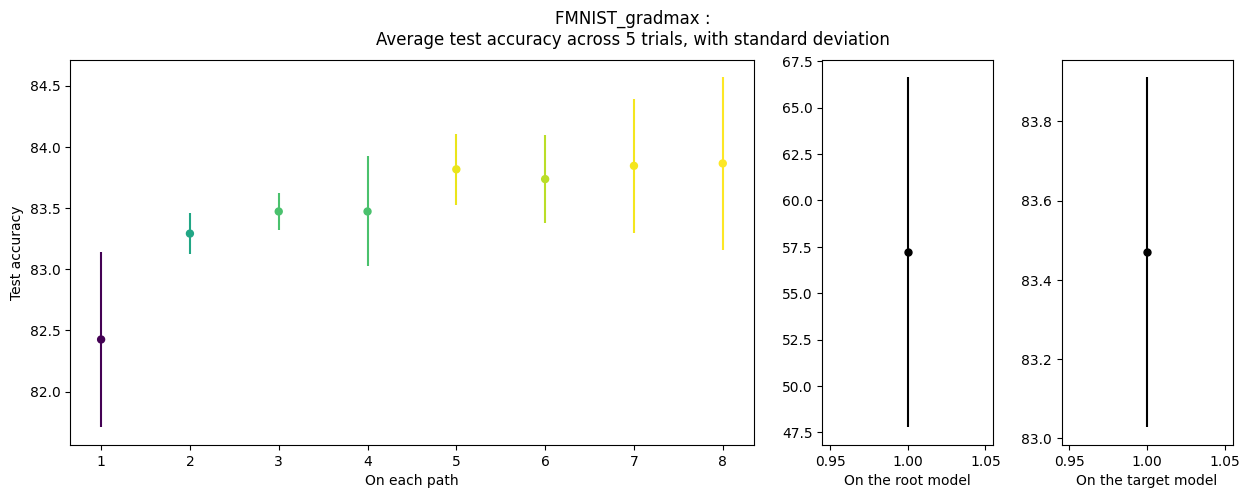

In [58]:
visualize_statistical_reliability (test_accs_repeted, test_accs, test_acc_roots, test_acc_targets,
                                   free_lim=True, savefig=savefig)

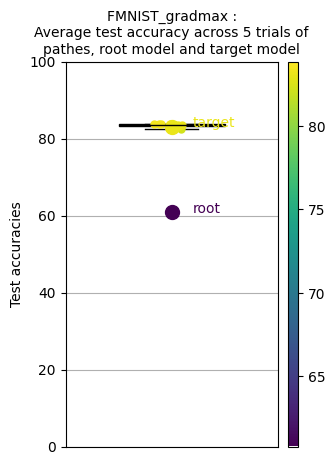

In [59]:
visualize_box_plot(test_accs, test_acc_root, test_acc_target, savefig)

# CIFAR 10

## Get data loaders

In [49]:
batch_size=128

In [50]:
train_loader, val_loader, test_loader = get_CIFAR10_loaders(data_path, range(10), batch_size)

## Random Initialization

In [51]:
init_name = "random"
savefig = "CIFAR10_random"

### Define, train and test both root & target models

In [52]:
# Network's initial architecture
num_inputs = 32*32*3
num_hidden = 10
num_outputs = 10

# Network's final architecture
num_hidden_target = 100

# Loss & optimizer
loss_name = "MSE" # "CE"
optimizer_name = "Adam"

# Hyperparameters
num_epochs = 3
lr = 5e-3
growth_schedule = None

# Experiment parameters
num_repetitions = 5

#### Root model

In [53]:
test_acc_roots = []
for i in range(num_repetitions) :
    root_model = ANN(num_inputs, num_hidden, num_outputs).to(device)
    _ = train(root_model, num_outputs, growth_schedule, loss_name, optimizer_name, lr, train_loader, val_loader, num_epochs, batch_size, device, verbose=0)
    test_acc_root = test(root_model, test_loader, batch_size, device)
    test_acc_roots.append(test_acc_root)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:13<00:00,  4.65s/it]


In [54]:
test_acc_roots

[26.903076923076924,
 23.96846153846154,
 23.627692307692307,
 26.39217948717949,
 25.3702564102564]

#### Target model

In [55]:
test_acc_targets = []
for i in range(num_repetitions) :
    target_model = ANN(num_inputs, num_hidden_target, num_outputs).to(device)
    _ = train(target_model, num_outputs, growth_schedule, loss_name, optimizer_name, lr, train_loader, val_loader, num_epochs, batch_size, device, verbose=0)
    test_acc_target = test(target_model, test_loader, batch_size, device)
    test_acc_targets.append(test_acc_target)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:14<00:00,  4.92s/it]


In [56]:
test_acc_targets

[40.19435897435897,
 38.78141025641026,
 40.154487179487155,
 40.183974358974375,
 38.92205128205127]

### Grow root model

In [57]:
# Growth parameters
num_neurons = 9

In [58]:
growth_schedules = get_handcrafted_schedule(num_neurons)

In [59]:
test_accs_repeted = []
for i in range(num_repetitions) :
    test_accs = []
    for growth_schedule in growth_schedules :
        root_model = ANN(num_inputs, num_hidden, num_outputs).to(device)
        _ = train(root_model,
                  num_outputs,
                  growth_schedule,
                  loss_name, 
                  optimizer_name, lr, 
                  train_loader, val_loader, 
                  num_epochs, batch_size, 
                  device,
                  init_name=init_name,
                  verbose=0)
        test_acc = test(root_model, test_loader, batch_size, device)
        test_accs.append(test_acc)
    test_accs_repeted.append(test_accs)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:15<00:00,  5.21s/it]


In [60]:
test_accs_repeted = np.array(test_accs_repeted)
test_accs = np.mean(test_accs_repeted, 0)

### Visualize results

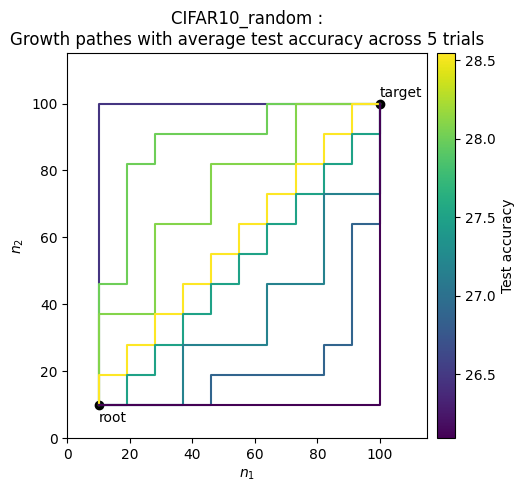

In [61]:
visualize_pathes(num_hidden, num_hidden_target, growth_schedules, test_accs, savefig)

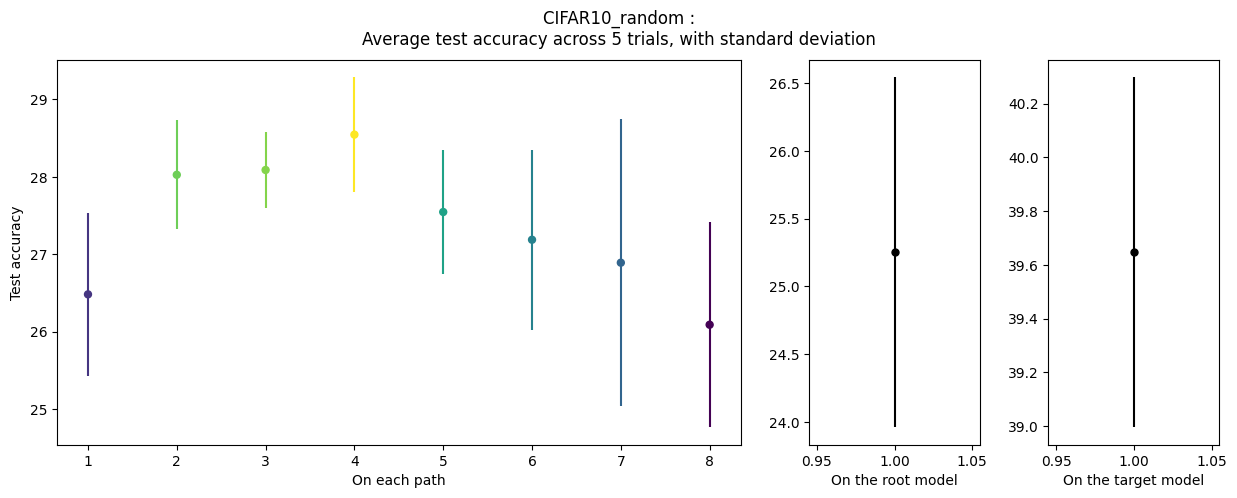

In [62]:
visualize_statistical_reliability (test_accs_repeted, test_accs, test_acc_roots, test_acc_targets,
                                   free_lim=True, savefig=savefig)

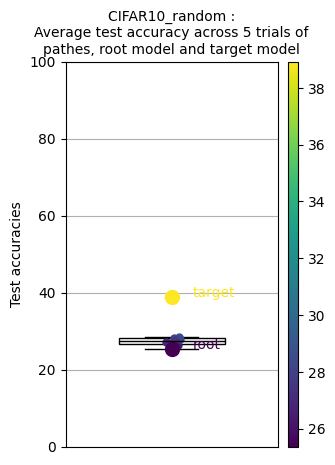

In [63]:
visualize_box_plot(test_accs, test_acc_root, test_acc_target, savefig)

## GradMax Initialization

In [64]:
init_name = "gradmax"
savefig = "CIFAR10_gradmax"

### Define, train and test both root & target models

In [65]:
# Network's initial architecture
num_inputs = 32*32*3
num_hidden = 10
num_outputs = 10

# Network's final architecture
num_hidden_target = 100

# Loss & optimizer
loss_name = "MSE" # "CE"
optimizer_name = "Adam"

# Hyperparameters
num_epochs = 3
lr = 5e-3
growth_schedule = None

# Experiment parameters
num_repetitions = 5

#### Root model

In [66]:
test_acc_roots = []
for i in range(num_repetitions) :
    root_model = ANN(num_inputs, num_hidden, num_outputs).to(device)
    _ = train(root_model, num_outputs, growth_schedule, loss_name, optimizer_name, lr, train_loader, val_loader, num_epochs, batch_size, device, verbose=0)
    test_acc_root = test(root_model, test_loader, batch_size, device)
    test_acc_roots.append(test_acc_root)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:28<00:00,  9.52s/it]


In [67]:
test_acc_roots

[24.069102564102565,
 26.542179487179492,
 25.951282051282046,
 24.739743589743586,
 24.699102564102557]

#### Target model

In [68]:
test_acc_targets = []
for i in range(num_repetitions) :
    target_model = ANN(num_inputs, num_hidden_target, num_outputs).to(device)
    _ = train(target_model, num_outputs, growth_schedule, loss_name, optimizer_name, lr, train_loader, val_loader, num_epochs, batch_size, device, verbose=0)
    test_acc_target = test(target_model, test_loader, batch_size, device)
    test_acc_targets.append(test_acc_target)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:28<00:00,  9.65s/it]


In [69]:
test_acc_targets

[40.09384615384616,
 39.79307692307693,
 40.6847435897436,
 40.29371794871796,
 40.4244871794872]

### Grow root model

In [70]:
# Growth parameters
num_neurons = 9

In [71]:
growth_schedules = get_handcrafted_schedule(num_neurons)

In [72]:
test_accs_repeted = []
for i in range(num_repetitions) :
    test_accs = []
    for growth_schedule in growth_schedules :
        root_model = ANN(num_inputs, num_hidden, num_outputs).to(device)
        _ = train(root_model,
                  num_outputs,
                  growth_schedule,
                  loss_name, 
                  optimizer_name, lr, 
                  train_loader, val_loader, 
                  num_epochs, batch_size, 
                  device,
                  init_name=init_name,
                  verbose=0)
        test_acc = test(root_model, test_loader, batch_size, device)
        test_accs.append(test_acc)
    test_accs_repeted.append(test_accs)

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]C:\Users\Mathis\Desktop\Bahut\M2\Stage\Master-Thesis\Workspace\Growth\Motivation\lib\model.py:36: RuntimeWarning: divide by zero encountered in divide
  scaler = c / np.sqrt(eigenvals.sum())
100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:28<00:00,  9.49s/it]


In [73]:
test_accs_repeted = np.array(test_accs_repeted)
test_accs = np.mean(test_accs_repeted, 0)

### Visualize results

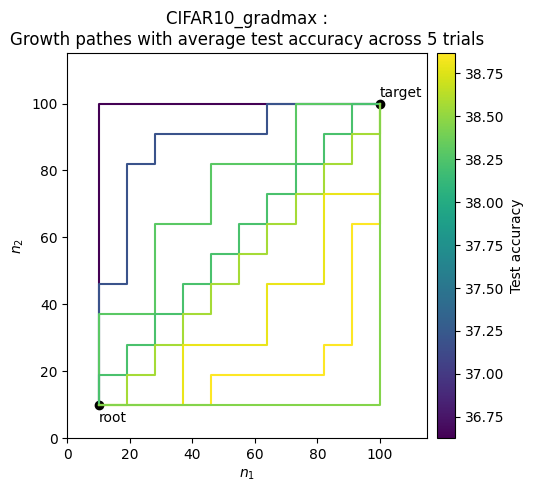

In [74]:
visualize_pathes(num_hidden, num_hidden_target, growth_schedules, test_accs, savefig)

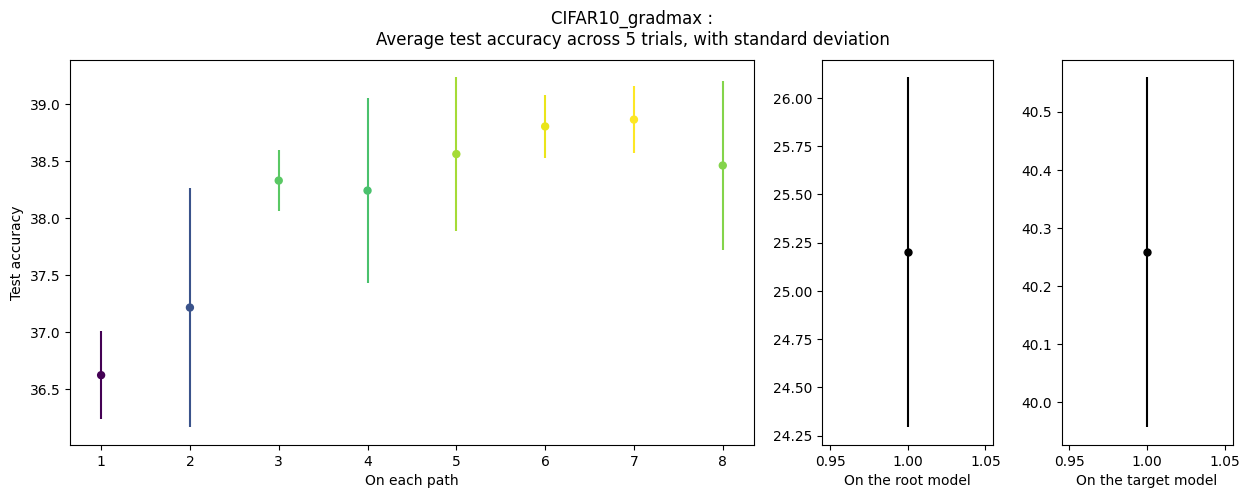

In [75]:
visualize_statistical_reliability (test_accs_repeted, test_accs, test_acc_roots, test_acc_targets,
                                   free_lim=True, savefig=savefig)

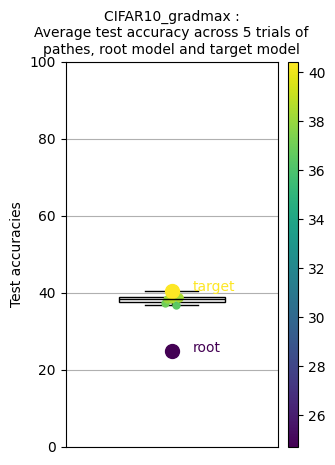

In [76]:
visualize_box_plot(test_accs, test_acc_root, test_acc_target, savefig)